<a href="https://colab.research.google.com/github/IKnigencev/Deep-Learning-example/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение модели на данных MNIST


In [1]:
# Подключение к гугл диску 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
# Импорт необходимых библиотек 

from tensorflow.keras.datasets import mnist     
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten  
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout
from tensorflow.keras import utils              

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np                             
import matplotlib.pyplot as plt  
from tensorflow.keras.preprocessing import image 
from PIL import Image 

%matplotlib inline 

## Глобальные переменные 

In [58]:
img_height = 28
img_width = 28
TARGET_SIZE = (img_height, img_width)

VAL_SPLIT  = 0.2

BATCH_SIZE = 128
EPOCHS = 4

CLASS_LABELS = [f'{i}' for i in range(10)]

CLASS_COUNT = 10

## Утилиты


In [44]:
def build_model(model, x_train, y_train, x_val, y_val, epochs, batch_size, class_labels):
  # Построение модели + схема модели + обучение + вывод графиков результата 

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  display(utils.plot_model(model, show_shapes=True, dpi=50))

  history = model.fit(x_train, y_train, 
                      validation_data=(x_val, y_val),
                      epochs=epochs,
                      batch_size=batch_size,
                      verbose=1
  )

  plot_result_epochs(history)

  plot_matrix_loss(model, x_val, y_val, class_labels)

  return model


In [54]:
def plot_result_epochs(history):
  # Визуализация результатов обучения 

  plt.plot(history.history['accuracy'], 
           label='Доля верных ответов на тренировочных данных')
  plt.plot(history.history['val_accuracy'],
           label='Доля верных ответов на валидационных данных')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Процент')
  plt.legend()
  
  plt.show()

  plt.plot(history.history['loss'], 
           label='Ошибка на тренировочных данных')
  plt.plot(history.history['val_loss'], 
           label='Ошибка на валидационных данных')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()

  plt.show()

In [56]:
def plot_matrix_loss(model, x, y_true, class_labels):
  # Визуализация матрицы ошибок 

  y_pred = model.predict(x)

  cm = confusion_matrix(np.argmax(y_true, axis=1),
                                np.argmax(y_pred, axis=1), 
                                normalize='true')
  
  cm = np.around(cm, 3)

  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_title('Матрица ошибок')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
  disp.plot(ax=ax)
  plt.gca().images[-1].colorbar.remove() 
  plt.xlabel('Предсказанные классы', fontsize=16)
  plt.ylabel('Верные классы', fontsize=16)
  fig.autofmt_xdate(rotation=45)        

  plt.show()  


  for cls in range(len(class_labels)):

    cls_pred = np.argmax(cm[cls])
    msg = 'ВЕРНО ;)' if cls_pred == cls else 'НЕВЕРНО :-('

    print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

  print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [93]:
def show_result_on_photo(photo="drive/MyDrive/p2.jpg", target_size_photo=(28,28)):
  # Вывод результатат распознования по фотографии 

  imgs = image.load_img("drive/MyDrive/p2.jpg", target_size=(28, 28), color_mode='grayscale')
  img = image.img_to_array(imgs)
  img = np.array(img)

  normalized_image = img.astype(np.float32) / 255.0

  x = np.expand_dims(img, axis=0)
  prediction = model.predict(x) 
  pred = np.argmax(prediction)
  print(f'Результат определения: {pred} \n')

  imge = plt.imread("drive/MyDrive/p2.jpg")

  fig, ax = plt.subplots()

  ax.imshow(imge)
  ax.set_title(f'Результат распознование: {pred}')

  fig.set_figwidth(7)    
  fig.set_figheight(7)    

  plt.show()


## Загрузка данных 

In [31]:
# Загрузка данных + преобразование данных 
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.astype('float32') / 255.

x_test = x_test_org.astype('float32') / 255.

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [32]:
# Распределение данных на валидационную и тренировочную выборки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SPLIT)

In [34]:
print(f'Тренировочные данные: \n {x_train.shape} \n {y_train.shape}')
print(f'Валидационные данные: \n {x_val.shape} \n {y_val.shape}')
print(f'Тестовые данные: \n {x_val.shape} \n {y_val.shape}')


Тренировочные данные: 
 (48000, 28, 28) 
 (48000, 10)
Валидационные данные: 
 (12000, 28, 28) 
 (12000, 10)
Тестовые данные: 
 (12000, 28, 28) 
 (12000, 10)


## Обучение модели

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 dense_15 (Dense)            (None, 800)               40141600  
                                                                 
 dense_16 (Dense)            (None, 400)               320400    
                                                                 
 dense_17 (Dense)            (None, 10)                4010      
                                                     

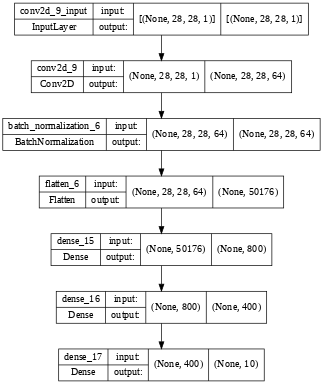

Epoch 1/4
375/375 [==============================] - 442s 1s/step - loss: 0.4033 - accuracy: 0.9355 - val_loss: 0.6908 - val_accuracy: 0.9576
Epoch 2/4
375/375 [==============================] - 437s 1s/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0812 - val_accuracy: 0.9762
Epoch 3/4
375/375 [==============================] - 437s 1s/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0916 - val_accuracy: 0.9756
Epoch 4/4
375/375 [==============================] - 437s 1s/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.1071 - val_accuracy: 0.9754


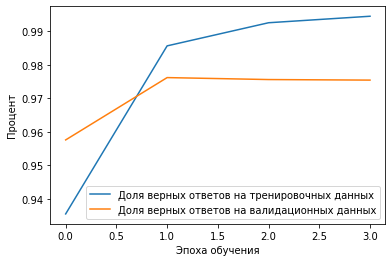

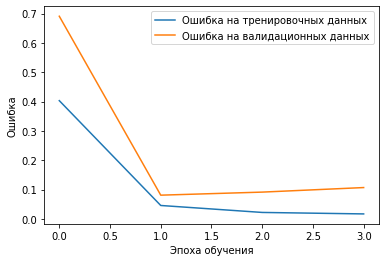

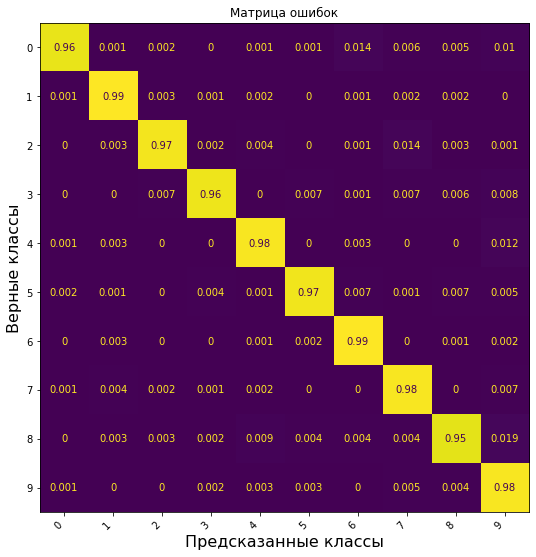

Класс: 0                     96% сеть отнесла к классу 0                    - ВЕРНО ;)
Класс: 1                     99% сеть отнесла к классу 1                    - ВЕРНО ;)
Класс: 2                     97% сеть отнесла к классу 2                    - ВЕРНО ;)
Класс: 3                     96% сеть отнесла к классу 3                    - ВЕРНО ;)
Класс: 4                     98% сеть отнесла к классу 4                    - ВЕРНО ;)
Класс: 5                     97% сеть отнесла к классу 5                    - ВЕРНО ;)
Класс: 6                     99% сеть отнесла к классу 6                    - ВЕРНО ;)
Класс: 7                     98% сеть отнесла к классу 7                    - ВЕРНО ;)
Класс: 8                     95% сеть отнесла к классу 8                    - ВЕРНО ;)
Класс: 9                     98% сеть отнесла к классу 9                    - ВЕРНО ;)

Средняя точность распознавания:  98%


In [59]:
# Создание модели
model = Sequential()

model.add(Conv2D(64, (2,2), padding='same', activation='relu', input_shape=(img_width, img_height, 1)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(800, activation='relu')) 

model.add(Dense(400, activation='relu')) 

model.add(Dense(CLASS_COUNT, activation='softmax')) 

model = build_model(model, x_train ,y_train, x_val, y_val, EPOCHS, BATCH_SIZE, CLASS_LABELS)

In [63]:
# Проверка точности на тестовых данных
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 24s 77ms/step - loss: 0.0927 - accuracy: 0.9780


In [64]:
print(scores)

[0.09271202236413956, 0.9779999852180481]


In [69]:
print(f'Процент распознования на тестовыx данных: {round(scores[1] * 100, 3)} % ')

Процент распознования на тестовыx данных: 97.8 % 


In [70]:
# Сохранение модели
model.save('drive/MyDrive/model_mnist.h5')

# Распознование рукописной цифры

Результат определения: 0 



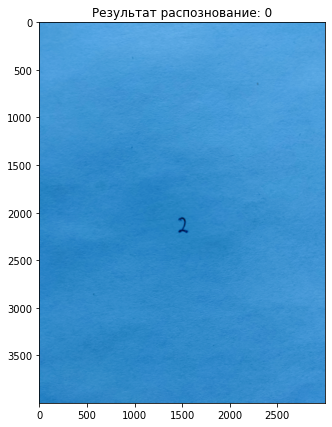

In [94]:
show_result_on_photo()